Задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
Задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
Задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
Задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
Задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
Задание 6: Могла ли модель переобучиться? Почему?
Задание 7 (опциональное): Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.



In [210]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [211]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)


In [212]:
def calc_logloss(y, y_pred):
        err = - np.mean(y * np.log(np.ma.array(y_pred)) + (1.0 - y) * np.log(1.0 - np.ma.array(y_pred)))
        return err

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res


def eval_model(X, y, iterations, alpha=1e-4):
    err_history = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        err_history.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, err_history

def calc_pred(W, X):
    
    m = X.shape[1]    
    y_predicted = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(W.T, X))
    for i in range(A.shape[1]):
            if A[:,i] > 0.5: 
                y_predicted[:, i] = 1
            elif A[:,i] <= 0.5:
                y_predicted[:, i] = 0
        
    return y_predicted


def plot_fit_history(weights_history: np.array,
                     errors_history: np.array,
                     figsize = (15,5)) -> None:
    
    fig = plt.figure(figsize=(15,5))
    plt.suptitle(
        f'Optional rounds: {len(err_history)}, Error: {round(err_history[-1],2)}, Alpha = {learning_rate}',
        size = 15
    )
    plt.subplot(121)
    plt.plot(err_history, linewidth=3)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('Log loss', size=15)
    

def score(y,y_predicted):
    
    accuracy = 100.0 - np.mean(np.abs(y_predicted - y)*100.0)
    
    m_tp = 0
    m_fp = 0
    m_fn = 0
    m_tn = 0
    
    for i in range(0,10):
        
         if y_predicted[i] == 1:
            if y_predicted[i] == y[i]:
                m_tp += 1
            else:
                m_fp += 1
           
         else:
            if y_predicted[i] == y[i]:
                m_tn += 1
            else:
                m_fp += 1
         
            
    mistake_matrix = {
        'y = +1' : [m_tp,m_fp],
        'y = -1' : [m_fn,m_tn]
    }       
    mistake_matrix = pd.DataFrame(data=mistake_matrix,columns=['y = +1', 'y = -1'], index=['$a_{1}$(x) = +1','$a_{1}$(x) = -1'])
    
    precision = m_tp/(m_tp+m_fp)
    recall = m_tp/(m_tp+m_fn)
    f_score = 2*precision*recall/(precision+recall)
    
    
    
    return mistake_matrix, accuracy, precision, recall, f_score
    
    
    
    

learning_rate = 0.01, n_iterations = 1450
145 [ 0.45572992 -0.24159533  1.13876895  1.67129621] --
290 [ 0.41064879 -0.35868178 -2.90308067  1.81220868] --
435 [ 0.37117718 -0.45700228 -0.66642702  1.96347685] --
580 [ 0.3361708  -0.54800877  5.08049814  2.12147033] 34.245713603500114
725 [ 0.29116933 -0.66501025  1.07980014  2.26246884] --
870 [ 0.24616933 -0.78201025 -2.92019973  2.40346885] --
1015 [ 0.21116827 -0.87301132  2.8292988   2.56146777] --
1160 [ 0.16616743 -0.99001217 -1.17109693  2.70246693] --
1305 [ 0.13116743 -1.08101217  4.57890326  2.86046693] 178.17886381255923
1450 [ 0.08616673 -1.19801287  0.57857475  3.00146622] --
learning_rate = 0.001, n_iterations = 1450
145 [ 0.4922476  -0.14989828  0.28439636  1.53717608] 117.17538302643807
290 [ 0.48805518 -0.16091837  0.15974136  1.55172655] 181.37458138913166
435 [ 0.48397815 -0.17110197  0.26035448  1.56662971] 129.5591955335909
580 [ 0.47960582 -0.18263647 -0.04980484  1.58088271] --
725 [ 0.47523319 -0.19416882 -0.35

<ipython-input-212-54d0b4f7dfb6>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(np.ma.array(y_pred)) + (1.0 - y) * np.log(1.0 - np.ma.array(y_pred)))
<ipython-input-212-54d0b4f7dfb6>:6: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))
<ipython-input-213-38630c167946>:12: UserWarning: Warning: converting a masked element to nan.
  err_history = np.array(err_history)


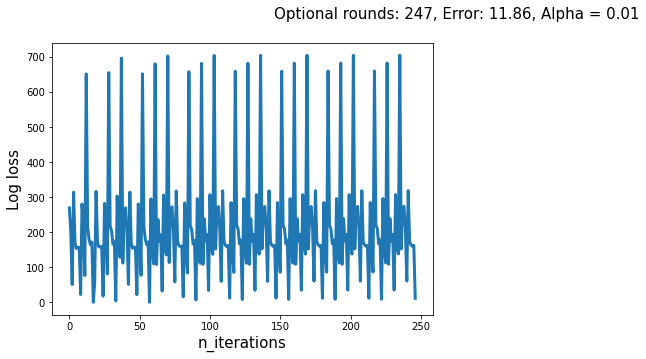

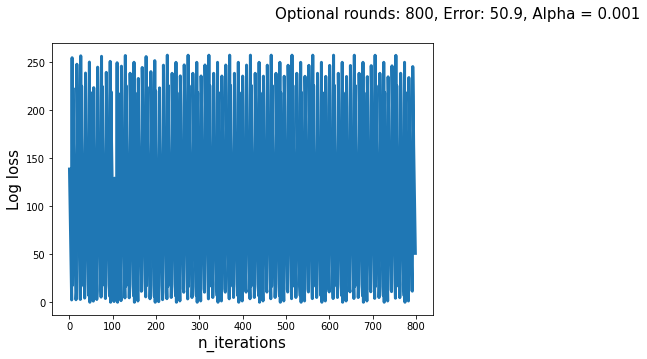

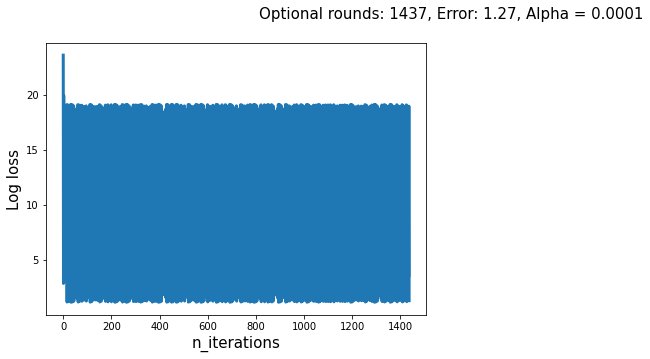

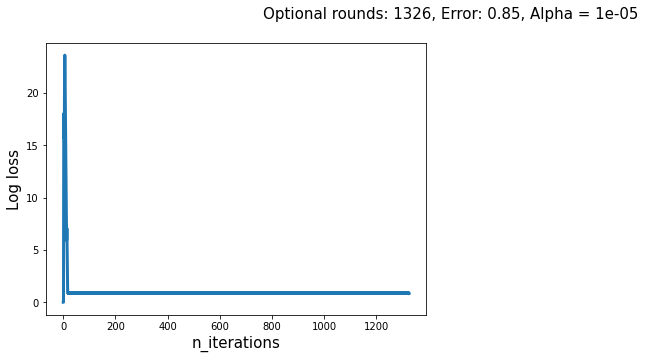

In [213]:
np.random.seed(228)
parameters_grid = [
    (1e-2, 1450), (1e-3, 1450), (1e-4, 1450), (1e-5, 1450), 
]

for learning_rate, n_iterations in parameters_grid:
    print(f'learning_rate = {learning_rate}, n_iterations = {n_iterations}')
    W, err_history = eval_model(
        X, y, alpha=learning_rate, iterations=n_iterations
    )
    err_history_old = err_history
    err_history = np.array(err_history)
    err_history = [x for x in err_history if str(x) != 'nan']

    plot_fit_history(W, err_history)



In [214]:
W, err_history = eval_model(X,y, 1450, 1e-5)

<ipython-input-212-54d0b4f7dfb6>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(np.ma.array(y_pred)) + (1.0 - y) * np.log(1.0 - np.ma.array(y_pred)))


145 [ 4.96006777e-01 -1.40098881e-01 -1.00792249e-03  1.52204557e+00] 0.9099482048794834
290 [ 0.49591854 -0.14015035 -0.00414983  1.52214301] 0.8479286417737593
435 [ 4.95835870e-01 -1.40183512e-01 -1.00829430e-03  1.52225108e+00] 0.9091443224879694
580 [ 0.49574763 -0.14023495 -0.00414971  1.52234852] 0.847879476799889
725 [ 4.95664955e-01 -1.40268093e-01 -1.00831475e-03  1.52245658e+00] 0.9090945176787211
870 [ 0.49557671 -0.14031951 -0.00414959  1.52255402] 0.8478303253526219
1015 [ 4.95494033e-01 -1.40352625e-01 -1.00833529e-03  1.52266208e+00] 0.9090447134217816
1160 [ 0.49540579 -0.14040401 -0.00414946  1.5227595 ] 0.8477811874235265
1305 [ 4.95323104e-01 -1.40437108e-01 -1.00835592e-03  1.52286756e+00] 0.9089949097305631
1450 [ 0.49523485 -0.14048847 -0.00414934  1.52296498] 0.8477320630041717


[masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 

In [225]:
mistake_matrix, accuracy, precision, recall, f_score = score(y,y_predicted)
print(f'Accuracy score   {accuracy} \nPrescision score {precision} \nRecall score     {recall}\nF score          {round(f_score,2)}')
print(mistake_matrix)

Accuracy score   70.0 
Prescision score 0.4 
Recall score     1.0
F score          0.57
                 y = +1  y = -1
$a_{1}$(x) = +1       2       0
$a_{1}$(x) = -1       3       5
